In [3]:
!pip install nltk
import nltk

nltk.download('punkt_tab')

import ssl
import pandas
import re
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Grams

[(('campaign',), 16), (('trump',), 13), (('suburbs',), 8), (('pennsylvania',), 7), (('harris',), 7), (('state',), 7), (('women',), 7), (('president',), 6)]
[(('margins', 'suburbs'), 4), (('former', 'president'), 3), (('donald', 'trump'), 3), (('montgomery', 'county'), 3), (('significant', 'margins'), 3), (('president', 'donald'), 2), (('rosemary', 'moller'), 2), (('jeffrey', 'moller'), 2)]
[(('significant', 'margins', 'suburbs'), 3), (('former', 'president', 'donald'), 2), (('president', 'donald', 'trump'), 2), (('believes', 'making', 'progress'), 2), (('making', 'progress', 'suburban'), 2), (('progress', 'suburban', 'margins'), 2), (('part', 'contending', 'trump'), 2), (('contending', 'trump', 'extremism'), 2)]


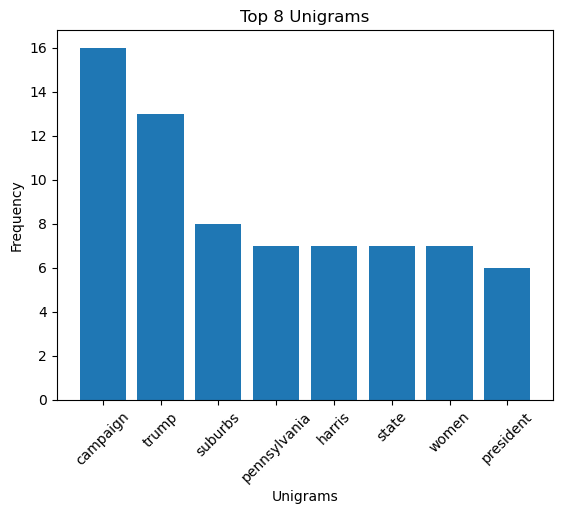

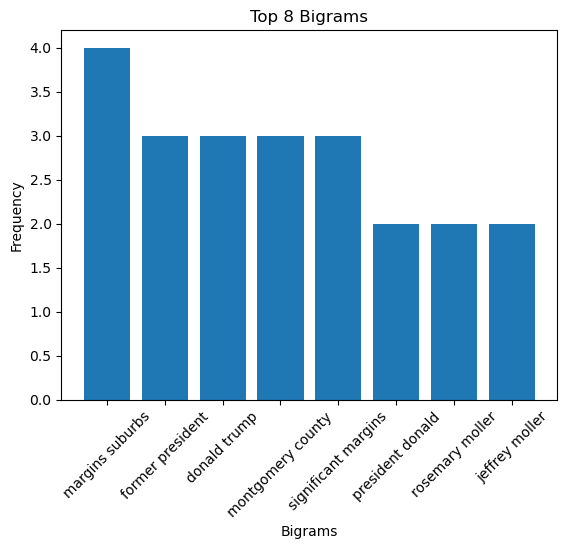

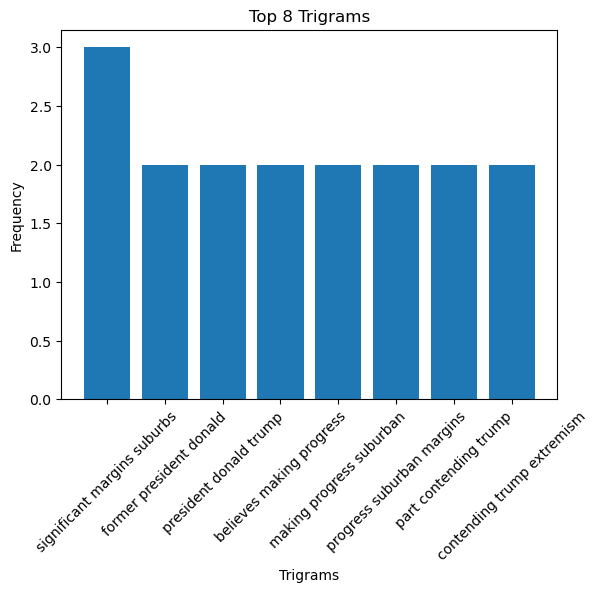

done


In [95]:
# Scripps


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below



inputdata = pandas.read_csv('D:\Homework 4\Homework4\Analysis\scripps.csv', sep=",", encoding='cp1252')
#print(type(inputdata['text'][0]))

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
#textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
#textlist = list(textdictionary.values())


textlist = inputdata['text'][0]


#convert text to lower case
#textlist_lowercase = [str(i).lower() for i in textlist]

textlist_lowercase = ""

for char in textlist:
    if char.isupper():
        textlist_lowercase += char.lower()
    else:
        textlist_lowercase += char

# print(textlist_lowercase)        


CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

textlist_lowercase = [textlist_lowercase]
reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())
        
# print(reviews)        
        
        
#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

# print(cleanedreviews)
        
reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("'\'", " ", text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

# print(textinstring)
    
text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]


alphabet_list = []

# Iterate and print items starting with an alphabet
for item in text_tokens_without_stopwords:
    if item and item[0].isalpha():  # Check if the first character is an alphabet
        alphabet_list.append(item)

# print(alphabet_list)

scripp = alphabet_list

unigrams = ngrams(alphabet_list , 1)
bigrams = ngrams(alphabet_list ,2)
trigrams = ngrams(alphabet_list ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

# Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []

for i in range(len(top8unigrams)):
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)  # Update to use top8unigrams_values
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()





print("done")

[(('harris',), 17), (('trump',), 17), (('state',), 11), (('president',), 9), (('washington',), 7), (('percentage',), 7), (('election',), 6), (('former',), 6)]
[(('former', 'president'), 5), (('washington', 'post-schar'), 5), (('post-schar', 'school'), 5), (('cook', 'political'), 4), (('political', 'report'), 4), (('electoral', 'votes'), 4), (('percentage', 'point'), 4), (('vice', 'president'), 3)]
[(('washington', 'post-schar', 'school'), 5), (('cook', 'political', 'report'), 4), (('post-schar', 'school', 'poll'), 3), (('harris', 'former', 'president'), 2), (('swing', 'states', 'arizona'), 2), (('percentage', 'points', 'harris'), 2), (('electoral', 'votes', 'grabs'), 2), (('state', 'electoral', 'votes'), 2)]


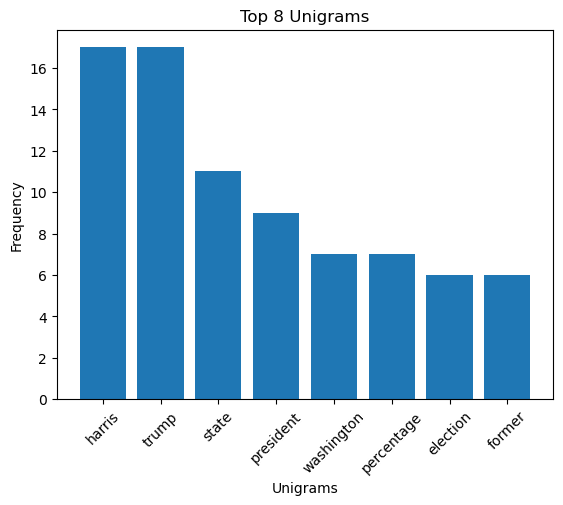

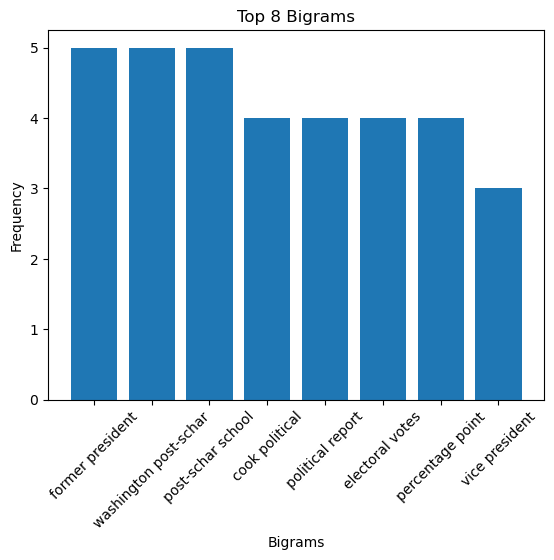

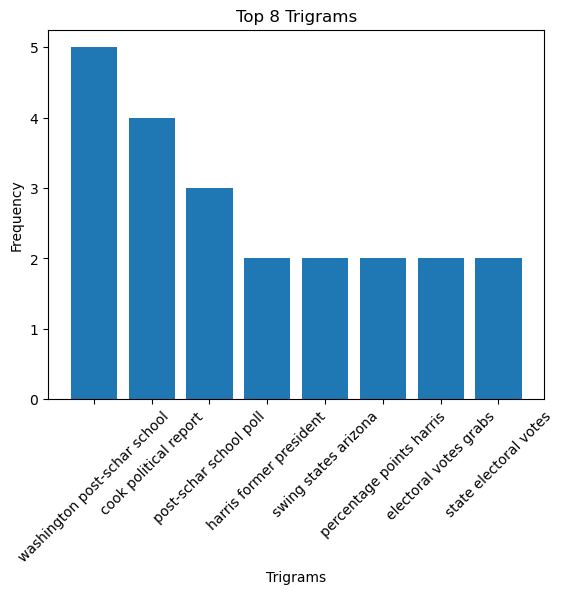

done


In [96]:
# deseret


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below



inputdata = pandas.read_csv('D:\Homework 4\Homework4\Analysis\deseret.csv')
#print(type(inputdata['text'][0]))

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
#textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
#textlist = list(textdictionary.values())


textlist = inputdata['text'][0]


#convert text to lower case
#textlist_lowercase = [str(i).lower() for i in textlist]

textlist_lowercase = ""

for char in textlist:
    if char.isupper():
        textlist_lowercase += char.lower()
    else:
        textlist_lowercase += char

# print(textlist_lowercase)        


CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

textlist_lowercase = [textlist_lowercase]
reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())
        
# print(reviews)        
        
        
#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

# print(cleanedreviews)
        
reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("'\'", " ", text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

# print(textinstring)
    
text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]


alphabet_list = []

# Iterate and print items starting with an alphabet
for item in text_tokens_without_stopwords:
    if item and item[0].isalpha():  # Check if the first character is an alphabet
        alphabet_list.append(item)

# print(alphabet_list)

deseret = alphabet_list


unigrams = ngrams(alphabet_list , 1)
bigrams = ngrams(alphabet_list ,2)
trigrams = ngrams(alphabet_list ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

# Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []

for i in range(len(top8unigrams)):
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)  # Update to use top8unigrams_values
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()



print("done")

[(('early',), 11), (('million',), 9), (('cast',), 6), (('voting',), 6), (('ballots',), 5), (('election',), 3), (('tracker',), 3), (('vote',), 3)]
[(('early', 'voting'), 4), (('swing', 'states'), 3), (('cast', 'ballots'), 2), (('university', 'florida'), 2), (('friday', 'million'), 2), (('surge', 'early'), 2), (('early', 'republican'), 2), (('north', 'carolina'), 2)]
[(('surge', 'early', 'republican'), 2), (('million', 'ballots', 'cast'), 2), (('democrats', 'voted', 'early'), 2), (('million', 'cast', 'ballots'), 1), (('cast', 'ballots', 'early'), 1), (('ballots', 'early', 'voting'), 1), (('early', 'voting', 'began'), 1), (('voting', 'began', 'nationwide'), 1)]


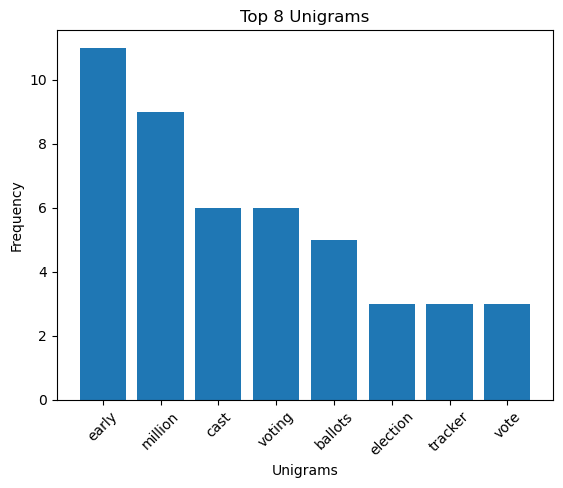

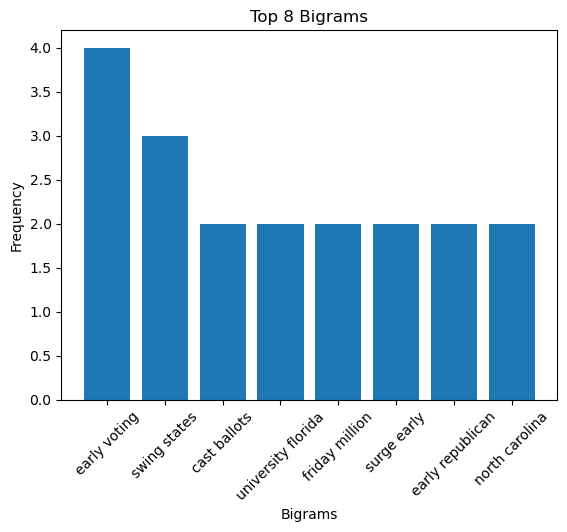

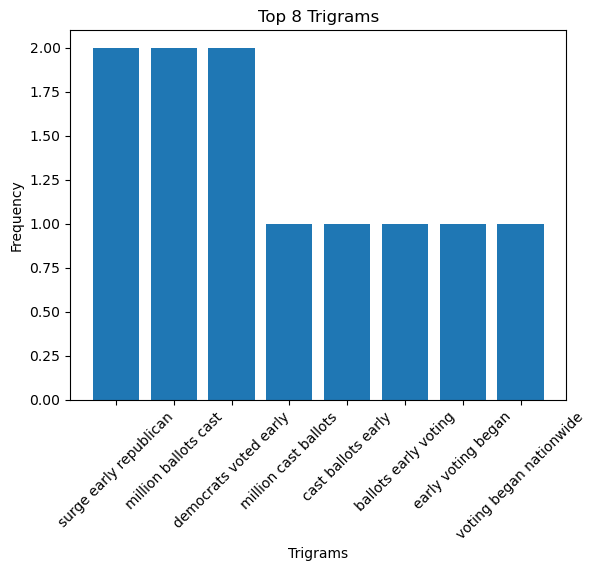

done


In [97]:
# Scripps


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below



inputdata = pandas.read_csv('D:\\Homework 4\\Homework4\\Analysis\\newsweek.csv', sep=",", encoding='cp1252')
#print(type(inputdata['text'][0]))

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
#textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
#textlist = list(textdictionary.values())


textlist = inputdata['text'][0]


#convert text to lower case
#textlist_lowercase = [str(i).lower() for i in textlist]

textlist_lowercase = ""

for char in textlist:
    if char.isupper():
        textlist_lowercase += char.lower()
    else:
        textlist_lowercase += char

# print(textlist_lowercase)        


CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

textlist_lowercase = [textlist_lowercase]
reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())
        
# print(reviews)        
        
        
#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

# print(cleanedreviews)
        
reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("'\'", " ", text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

# print(textinstring)
    
text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]


alphabet_list = []

# Iterate and print items starting with an alphabet
for item in text_tokens_without_stopwords:
    if item and item[0].isalpha():  # Check if the first character is an alphabet
        alphabet_list.append(item)

# print(alphabet_list)

newsweek = alphabet_list

unigrams = ngrams(alphabet_list , 1)
bigrams = ngrams(alphabet_list ,2)
trigrams = ngrams(alphabet_list ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

# Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []

for i in range(len(top8unigrams)):
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)  # Update to use top8unigrams_values
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()





print("done")

[(('trump',), 22), (('cent',), 22), (('harris',), 21), (('poll',), 12), (('president',), 7), (('voters',), 7), (('vote',), 6), (('biden',), 6)]
[(('cent', 'cent'), 7), (('donald', 'trump'), 3), (('york', 'times'), 3), (('cent', 'respondents'), 3), (('latest', 'poll'), 3), (('viewed', 'favourably'), 3), (('kamala', 'harris'), 2), (('remain', 'effectively'), 2)]
[(('remain', 'effectively', 'tied'), 2), (('effectively', 'tied', 'tumultuous'), 2), (('tied', 'tumultuous', 'months'), 2), (('tumultuous', 'months', 'recent'), 2), (('months', 'recent', 'american'), 2), (('recent', 'american', 'political'), 2), (('final', 'national', 'poll'), 2), (('poll', 'york', 'times'), 2)]


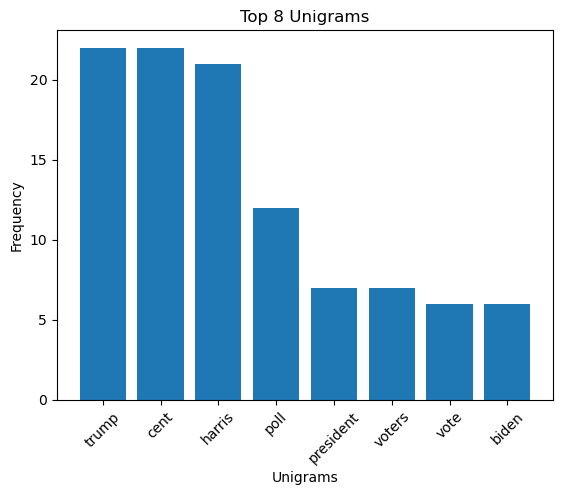

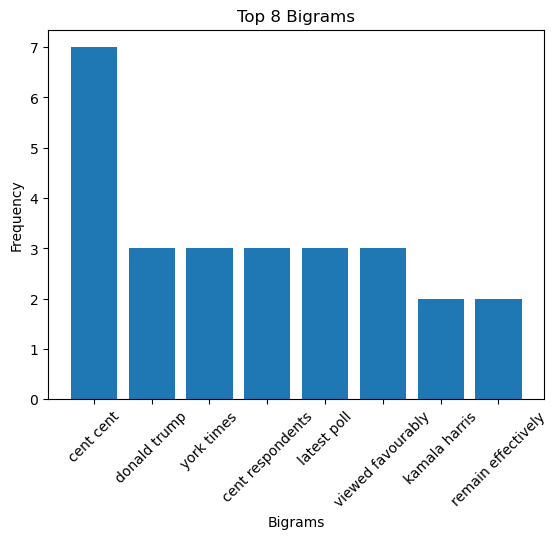

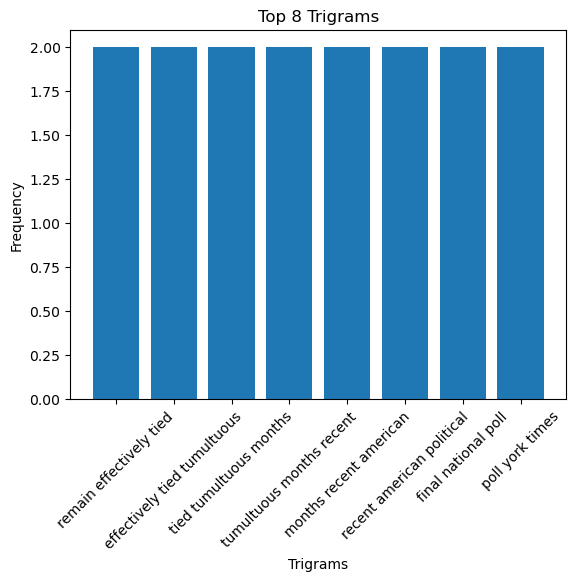

done


In [98]:
# Scripps


#I am creating an empty dictionary here
inputdata = {}
#header is my first row in the csv file that is why hesder is 0 below



inputdata = pandas.read_csv('D:\\Homework 4\\Homework4\\Analysis\\theglobeandmail.csv', sep=",", encoding='cp1252')
#print(type(inputdata['text'][0]))

#we can use type to check the data type of input data variable
#print(type(inputdata))

#I created a new dictionaru below for the Text column in the csv file
#textdictionary = inputdata.get("text")

#I am converting dictionary to a list so I can analyze the data
#textlist = list(textdictionary.values())


textlist = inputdata['text'][0]


#convert text to lower case
#textlist_lowercase = [str(i).lower() for i in textlist]

textlist_lowercase = ""

for char in textlist:
    if char.isupper():
        textlist_lowercase += char.lower()
    else:
        textlist_lowercase += char

# print(textlist_lowercase)        


CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

textlist_lowercase = [textlist_lowercase]
reviews = []

for text in textlist_lowercase :
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        reviews.append(string.strip())
        
# print(reviews)        
        
        
#Remove the stop words or the common words in english from the reviews
stopwords_list = stopwords.words('english')

cleanedreviews=[]
for item in reviews:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        cleanedreviews.append(string)

# print(cleanedreviews)
        
reviewswithoutlinks=[]
#Remove links
for text in cleanedreviews:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        reviewswithoutlinks.append(remove_com)

#Remove special characters
reviewswithoutlinks = [unidecode.unidecode(text) for text in reviewswithoutlinks]

#Get rid off empty spaces here and there
cleantext = [re.sub(r"\s+"," ",text) for text in reviewswithoutlinks]
#This is how we can remove individual words that does not make sense from the wordcloud
cleantext = [re.sub("Came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("came"," ",text) for text in reviewswithoutlinks]
cleantext = [re.sub("'\'", " ", text) for text in reviewswithoutlinks]

#Test it make sure the text is indeed clean!
#print(cleantext)

#Convert list to string. Most text analysis libraries require input to be a string
textinstring = ""
for eachletter in cleantext:
    textinstring += ''+ str(eachletter)

# print(textinstring)
    
text_tokens = word_tokenize(textinstring)

text_tokens_without_stopwords = [word for word in text_tokens if not word in stopwords.words()]


alphabet_list = []

# Iterate and print items starting with an alphabet
for item in text_tokens_without_stopwords:
    if item and item[0].isalpha():  # Check if the first character is an alphabet
        alphabet_list.append(item)

# print(alphabet_list)

theglobeandmail = alphabet_list

unigrams = ngrams(alphabet_list , 1)
bigrams = ngrams(alphabet_list ,2)
trigrams = ngrams(alphabet_list ,3)

mostcommonunigrams = Counter(unigrams)
#This will print top 3 unigrams
print(mostcommonunigrams.most_common(8))

mostcommonbigrams = Counter(bigrams)
print(mostcommonbigrams.most_common(8))

mostcommontrigrams = Counter(trigrams)
print(mostcommontrigrams.most_common(8))

# Draw a histogram of top 8 unigrams
top8unigrams = mostcommonunigrams.most_common(8)
top8unigrams_keys = []
top8unigrams_values = []

for i in range(len(top8unigrams)):
    top8unigrams_keys.append(top8unigrams[i][0][0])
    top8unigrams_values.append(top8unigrams[i][1])

import matplotlib.pyplot as plt

plt.bar(top8unigrams_keys, top8unigrams_values)  # Update to use top8unigrams_values
plt.title("Top 8 Unigrams")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

#########################################
# Draw a histogram of top 8 bigrams
top8bigrams = mostcommonbigrams.most_common(8)
top8bigrams_keys = []
top8bigrams_values = []

for i in range(len(top8bigrams)):
    top8bigrams_keys.append(" ".join(top8bigrams[i][0]))  # Join the bigram tuple into a string
    top8bigrams_values.append(top8bigrams[i][1])

plt.bar(top8bigrams_keys, top8bigrams_values)
plt.title("Top 8 Bigrams")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

################

# Draw a histogram of top 8 trigrams
top8trigrams = mostcommontrigrams.most_common(8)
top8trigrams_keys = []
top8trigrams_values = []

for i in range(len(top8trigrams)):
    top8trigrams_keys.append(" ".join(top8trigrams[i][0]))  # Join the trigram tuple into a string
    top8trigrams_values.append(top8trigrams[i][1])

plt.bar(top8trigrams_keys, top8trigrams_values)
plt.title("Top 8 Trigrams")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()





print("done")

# Word Cloud

keys white house decided ground pennsylvania campaigns blanketing commonwealth pivotal suburbs.both former president donald trump vice president kamala harris visited philadelphia suburbs week vie pennsylvania electoral votes suburban residents prove crucial effort make kamala wins rosemary moller alternative frightening husband jeffrey added million knocks campaign completed state volunteers canvass campaign offices hit pavement montgomery county region call home judged lawn signs lawns sign jeffrey moller neighborhood rosemary moller added bit kamala trump harris-walz campaign approaches pennsylvania go-everywhere tactics suburbs significant target full throttle organizing phone calls paid media recognizing significant margins suburbs win pennsylvania significant margins suburbs significant margins suburbs put work campaign years investing county parties investing local races excellent candidates state house state senate seats great work excellent members congress great work gas brak

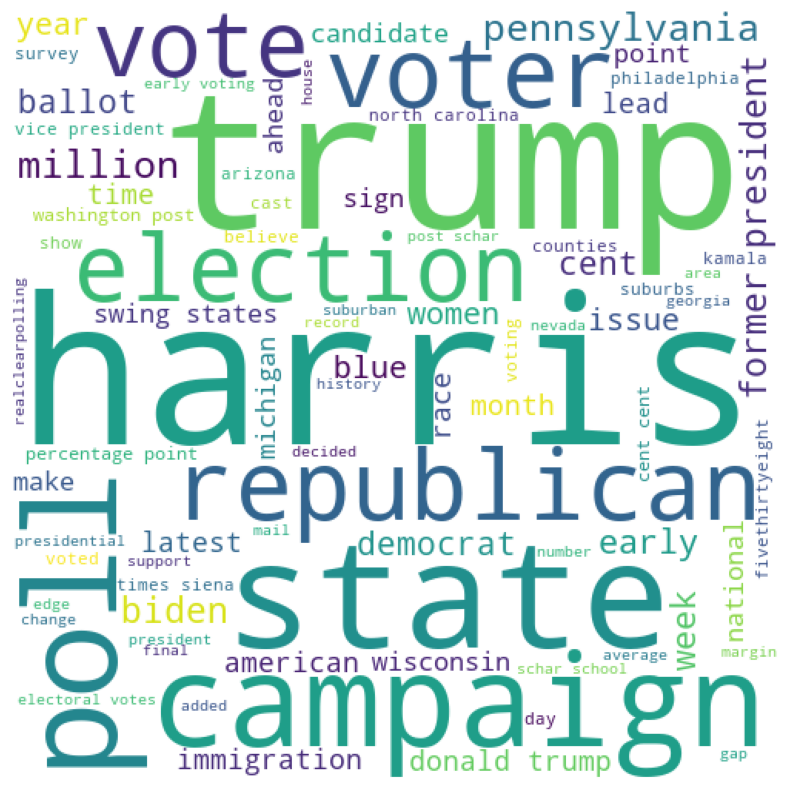

<AxesSubplot:title={'center':'Top Frequency Word Tokens in Text'}, xlabel='Samples', ylabel='Counts'>

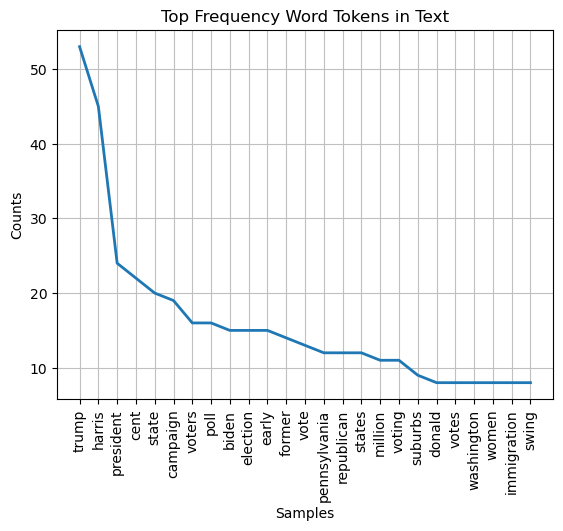

In [100]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# print(scripp)
# print(deseret)

combine = scripp + deseret + newsweek + theglobeandmail

textinstring = ""

for item in combine:
    if item and item[0].isalpha():
        if item != "n't":
            textinstring += item
            textinstring += " "

print(textinstring)

#World cloud requires a string as input
wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            min_font_size = 10).generate(textinstring)

plt.figure(figsize = (15, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

import nltk
diagramdata = nltk.FreqDist(combine)
#25 below means top 25 words from text 
diagramdata.plot(25, title="Top Frequency Word Tokens in Text")

# Sentiment

In [27]:
# Scripps

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'scripps.csv'

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pd.read_csv('D:\Homework 4\Homework4\Analysis\scripps.csv', sep=",", encoding='cp1252')



# Extract the paragraph from the first row
my_text = inputdata['text'][0]

# Directly analyze the paragraph with TextBlob and VADER
tbp = TextBlob(my_text).polarity
tbs = TextBlob(my_text).subjectivity

# Create a dictionary for TextBlob results
textblob_result = {"TextBlob Polarity Score": tbp, "TextBlob Subjectivity Score": tbs}
textblob_results_list = [textblob_result]

# Analyze the paragraph with VADER
vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(my_text)
vader_results_list = [vader_sentiment_analysis]

# Convert results to DataFrames
textblobresults = pd.DataFrame(textblob_results_list)
vaderresults = pd.DataFrame(vader_results_list)

# Print results
#print(vaderresults)
#print(textblobresults)

flesch_reading_ease_score = textstat.flesch_reading_ease(my_text)
gunning_fog_score = textstat.gunning_fog(my_text)

# Create DataFrames with the results
flesch_reading_ease_results = pd.DataFrame([{"Flesch Reading Ease Score": flesch_reading_ease_score}])
gunning_fog_results = pd.DataFrame([{"Gunning Fog Score": gunning_fog_score}])

# Print results (optional)
#print(flesch_reading_ease_results)
#print(gunning_fog_results)

combined_scores = {
    "News":'scripps',
    "text": my_text,
    "Flesch Reading Ease Score": flesch_reading_ease_score,
    "Gunning Fog Score": gunning_fog_score,
    "TextBlob Polarity Score": tbp,
    "TextBlob Subjectivity Score": tbs,
    "VADER Compound Score": vader_sentiment_analysis['compound'],
    "VADER Positive Score": vader_sentiment_analysis['pos'],
    "VADER Neutral Score": vader_sentiment_analysis['neu'],
    "VADER Negative Score": vader_sentiment_analysis['neg']
}

# Create a single DataFrame with all the scores
combined_results_df = pd.DataFrame([combined_scores])
scripps_df = combined_results_df

# Print combined results
print(combined_results_df)

      News                                               text  \
0  scripps  The keys to the White House may be decided on ...   

   Flesch Reading Ease Score  Gunning Fog Score  TextBlob Polarity Score  \
0                      58.21              11.04                  0.21115   

   TextBlob Subjectivity Score  VADER Compound Score  VADER Positive Score  \
0                     0.431604                0.9994                  0.13   

   VADER Neutral Score  VADER Negative Score  
0                0.857                 0.013  


In [28]:
# theglobeandmail

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'theglobeandmail.csv'

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pd.read_csv('D:\\Homework 4\\Homework4\\theglobeandmail.csv', sep=",", encoding='cp1252')



# Extract the paragraph from the first row
my_text = inputdata['text'][0]

# Directly analyze the paragraph with TextBlob and VADER
tbp = TextBlob(my_text).polarity
tbs = TextBlob(my_text).subjectivity

# Create a dictionary for TextBlob results
textblob_result = {"TextBlob Polarity Score": tbp, "TextBlob Subjectivity Score": tbs}
textblob_results_list = [textblob_result]

# Analyze the paragraph with VADER
vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(my_text)
vader_results_list = [vader_sentiment_analysis]

# Convert results to DataFrames
textblobresults = pd.DataFrame(textblob_results_list)
vaderresults = pd.DataFrame(vader_results_list)

# Print results
#print(vaderresults)
#print(textblobresults)

flesch_reading_ease_score = textstat.flesch_reading_ease(my_text)
gunning_fog_score = textstat.gunning_fog(my_text)

# Create DataFrames with the results
flesch_reading_ease_results = pd.DataFrame([{"Flesch Reading Ease Score": flesch_reading_ease_score}])
gunning_fog_results = pd.DataFrame([{"Gunning Fog Score": gunning_fog_score}])

# Print results (optional)
#print(flesch_reading_ease_results)
#print(gunning_fog_results)

combined_scores = {
    "News":'theglobeandmail',
    "text": my_text,
    "Flesch Reading Ease Score": flesch_reading_ease_score,
    "Gunning Fog Score": gunning_fog_score,
    "TextBlob Polarity Score": tbp,
    "TextBlob Subjectivity Score": tbs,
    "VADER Compound Score": vader_sentiment_analysis['compound'],
    "VADER Positive Score": vader_sentiment_analysis['pos'],
    "VADER Neutral Score": vader_sentiment_analysis['neu'],
    "VADER Negative Score": vader_sentiment_analysis['neg']
}

# Create a single DataFrame with all the scores
combined_results_df = pd.DataFrame([combined_scores])
theglobeandmail_df = combined_results_df

# Print combined results
print(combined_results_df)

              News                                               text  \
0  theglobeandmail  Donald Trump and Kamala Harris remain effectiv...   

   Flesch Reading Ease Score  Gunning Fog Score  TextBlob Polarity Score  \
0                       57.4              11.48                 0.070026   

   TextBlob Subjectivity Score  VADER Compound Score  VADER Positive Score  \
0                     0.437078                0.9789                 0.059   

   VADER Neutral Score  VADER Negative Score  
0                0.902                 0.039  


In [29]:
# deseret

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'deseret.csv'

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pd.read_csv('D:\\Homework 4\\Homework4\\Analysis\\deseret.csv')



# Extract the paragraph from the first row
my_text = inputdata['text'][0]

# Directly analyze the paragraph with TextBlob and VADER
tbp = TextBlob(my_text).polarity
tbs = TextBlob(my_text).subjectivity

# Create a dictionary for TextBlob results
textblob_result = {"TextBlob Polarity Score": tbp, "TextBlob Subjectivity Score": tbs}
textblob_results_list = [textblob_result]

# Analyze the paragraph with VADER
vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(my_text)
vader_results_list = [vader_sentiment_analysis]

# Convert results to DataFrames
textblobresults = pd.DataFrame(textblob_results_list)
vaderresults = pd.DataFrame(vader_results_list)

# Print results
#print(vaderresults)
#print(textblobresults)

flesch_reading_ease_score = textstat.flesch_reading_ease(my_text)
gunning_fog_score = textstat.gunning_fog(my_text)

# Create DataFrames with the results
flesch_reading_ease_results = pd.DataFrame([{"Flesch Reading Ease Score": flesch_reading_ease_score}])
gunning_fog_results = pd.DataFrame([{"Gunning Fog Score": gunning_fog_score}])

# Print results (optional)
#print(flesch_reading_ease_results)
#print(gunning_fog_results)

combined_scores = {
    "News":'deseret',
    "text": my_text,
    "Flesch Reading Ease Score": flesch_reading_ease_score,
    "Gunning Fog Score": gunning_fog_score,
    "TextBlob Polarity Score": tbp,
    "TextBlob Subjectivity Score": tbs,
    "VADER Compound Score": vader_sentiment_analysis['compound'],
    "VADER Positive Score": vader_sentiment_analysis['pos'],
    "VADER Neutral Score": vader_sentiment_analysis['neu'],
    "VADER Negative Score": vader_sentiment_analysis['neg']
}

# Create a single DataFrame with all the scores
combined_results_df = pd.DataFrame([combined_scores])
deseret_df = combined_results_df

# Print combined results
print(combined_results_df)

      News                                               text  \
0  deseret  Election Day is two weeks away, and Vice Presi...   

   Flesch Reading Ease Score  Gunning Fog Score  TextBlob Polarity Score  \
0                      62.17               9.77                 0.037057   

   TextBlob Subjectivity Score  VADER Compound Score  VADER Positive Score  \
0                     0.331807                0.9955                 0.084   

   VADER Neutral Score  VADER Negative Score  
0                0.892                 0.024  


In [30]:
# newsweek

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import csv
import textstat

fname = 'newsweek.csv'

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pd.read_csv('D:\\Homework 4\\Homework4\\Analysis\\newsweek.csv')



# Extract the paragraph from the first row
my_text = inputdata['text'][0]

# Directly analyze the paragraph with TextBlob and VADER
tbp = TextBlob(my_text).polarity
tbs = TextBlob(my_text).subjectivity

# Create a dictionary for TextBlob results
textblob_result = {"TextBlob Polarity Score": tbp, "TextBlob Subjectivity Score": tbs}
textblob_results_list = [textblob_result]

# Analyze the paragraph with VADER
vader_sentiment_analysis = SentimentIntensityAnalyzer().polarity_scores(my_text)
vader_results_list = [vader_sentiment_analysis]

# Convert results to DataFrames
textblobresults = pd.DataFrame(textblob_results_list)
vaderresults = pd.DataFrame(vader_results_list)

# Print results
#print(vaderresults)
#print(textblobresults)

flesch_reading_ease_score = textstat.flesch_reading_ease(my_text)
gunning_fog_score = textstat.gunning_fog(my_text)

# Create DataFrames with the results
flesch_reading_ease_results = pd.DataFrame([{"Flesch Reading Ease Score": flesch_reading_ease_score}])
gunning_fog_results = pd.DataFrame([{"Gunning Fog Score": gunning_fog_score}])

# Print results (optional)
#print(flesch_reading_ease_results)
#print(gunning_fog_results)

combined_scores = {
    "News":'newsweek',
    "text": my_text,
    "Flesch Reading Ease Score": flesch_reading_ease_score,
    "Gunning Fog Score": gunning_fog_score,
    "TextBlob Polarity Score": tbp,
    "TextBlob Subjectivity Score": tbs,
    "VADER Compound Score": vader_sentiment_analysis['compound'],
    "VADER Positive Score": vader_sentiment_analysis['pos'],
    "VADER Neutral Score": vader_sentiment_analysis['neu'],
    "VADER Negative Score": vader_sentiment_analysis['neg']
}

# Create a single DataFrame with all the scores
combined_results_df = pd.DataFrame([combined_scores])
newsweek_df = combined_results_df

# Print combined results
print(combined_results_df)

       News                                               text  \
0  newsweek  Over 31 million people have already cast their...   

   Flesch Reading Ease Score  Gunning Fog Score  TextBlob Polarity Score  \
0                      56.25               9.41                 0.124109   

   TextBlob Subjectivity Score  VADER Compound Score  VADER Positive Score  \
0                     0.361898                 0.872                 0.041   

   VADER Neutral Score  VADER Negative Score  
0                0.954                 0.005  


In [31]:
# Combine the DataFrames
all_mod = pd.concat([newsweek_df, deseret_df, theglobeandmail_df, scripps_df], ignore_index=True)

# Display the combined DataFrame
print(all_mod)

              News                                               text  \
0         newsweek  Over 31 million people have already cast their...   
1          deseret  Election Day is two weeks away, and Vice Presi...   
2  theglobeandmail  Donald Trump and Kamala Harris remain effectiv...   
3          scripps  The keys to the White House may be decided on ...   

   Flesch Reading Ease Score  Gunning Fog Score  TextBlob Polarity Score  \
0                      56.25               9.41                 0.124109   
1                      62.17               9.77                 0.037057   
2                      57.40              11.48                 0.070026   
3                      58.21              11.04                 0.211150   

   TextBlob Subjectivity Score  VADER Compound Score  VADER Positive Score  \
0                     0.361898                0.8720                 0.041   
1                     0.331807                0.9955                 0.084   
2                  

In [32]:
all_mod.describe()

,Flesch Reading Ease Score,Gunning Fog Score,TextBlob Polarity Score,TextBlob Subjectivity Score,VADER Compound Score,VADER Positive Score,VADER Neutral Score,VADER Negative Score
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,58.507500,10.425000,0.110586,0.390597,0.961450,0.078500,0.901250,0.020250
std,2.570686,0.991716,0.076043,0.052032,0.060292,0.038596,0.040111,0.014728
min,56.250000,9.410000,0.037057,0.331807,0.872000,0.041000,0.857000,0.005000
25%,57.112500,9.680000,0.061784,0.354376,0.952175,0.054500,0.883250,0.011000
50%,57.805000,10.405000,0.097067,0.396751,0.987200,0.071500,0.897000,0.018500
75%,59.200000,11.150000,0.145869,0.432972,0.996475,0.095500,0.915000,0.027750
max,62.170000,11.480000,0.211150,0.437078,0.999400,0.130000,0.954000,0.039000


In [34]:
all_mod.to_csv('allmod.csv')

In [46]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('D:\\Homework 4\\Homework4\\allmod.csv')
print(df.columns)

# Print the DataFrame
print(my_data)


Index(['news', 'affiliation', 'Flesch Reading Ease Score', 'Gunning Fog Score',
       'TextBlob Polarity Score', 'TextBlob Subjectivity Score',
       'VADER Compound Score', 'VADER Positive Score', 'VADER Neutral Score',
       'VADER Negative Score'],
      dtype='object')
              news   affiliation  Flesch Reading Ease Score  \
0         newsweek      moderate                      56.25   
1          deseret      moderate                      62.17   
2  theglobeandmail      moderate                      57.40   
3          scripps      moderate                      58.21   
4       al-jazeera       liberal                      56.89   
5     daily signal  conservative                      52.39   
6              fox  conservative                      74.08   
7            msnbc       liberal                      63.19   
8         townhall  conservative                      42.82   
9              vox       liberal                      58.72   

   Gunning Fog Score  TextBlo

In [47]:
import pandas as pd

result_df = df.groupby('affiliation')[[
    'Flesch Reading Ease Score', 
    'Gunning Fog Score', 
    'TextBlob Polarity Score', 
    'TextBlob Subjectivity Score',
    'VADER Compound Score', 
    'VADER Positive Score', 
    'VADER Neutral Score', 
    'VADER Negative Score'
]].mean().reset_index()

# Display the resulting DataFrame
print(result_df)


    affiliation  Flesch Reading Ease Score  Gunning Fog Score  \
0  conservative                    56.4300          11.073333   
1       liberal                    59.6000          11.500000   
2      moderate                    58.5075          10.425000   

   TextBlob Polarity Score  TextBlob Subjectivity Score  VADER Compound Score  \
0                 0.024815                     0.394335             -0.682933   
1                 0.074373                     0.424059             -0.929333   
2                 0.110586                     0.390597              0.961450   

   VADER Positive Score  VADER Neutral Score  VADER Negative Score  
0              0.086333             0.841333              0.072333  
1              0.118333             0.785667              0.096000  
2              0.078500             0.901250              0.020250  


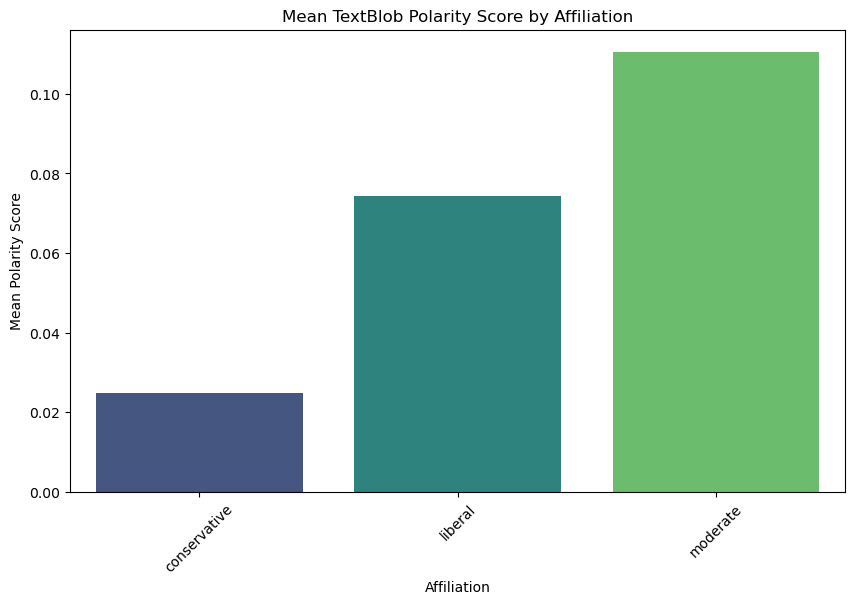

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'TextBlob Polarity Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


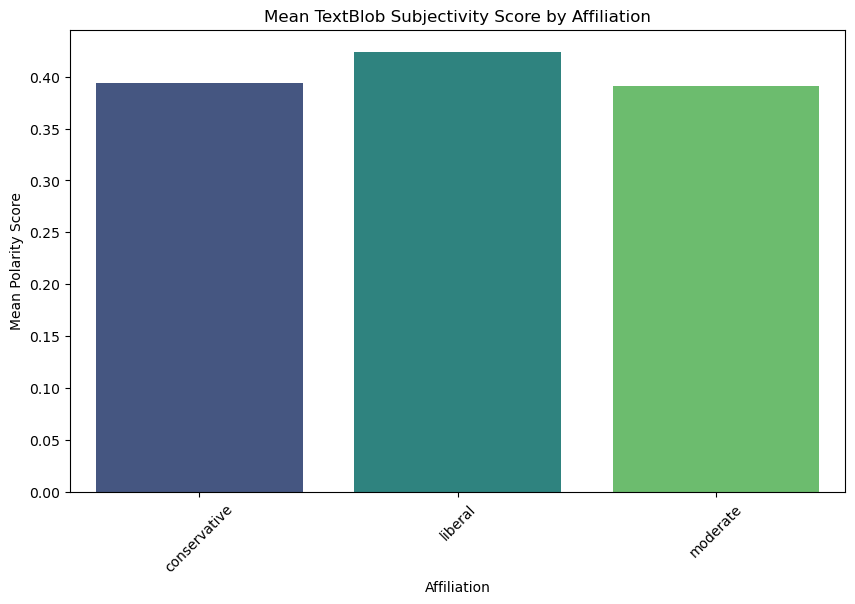

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'TextBlob Subjectivity Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


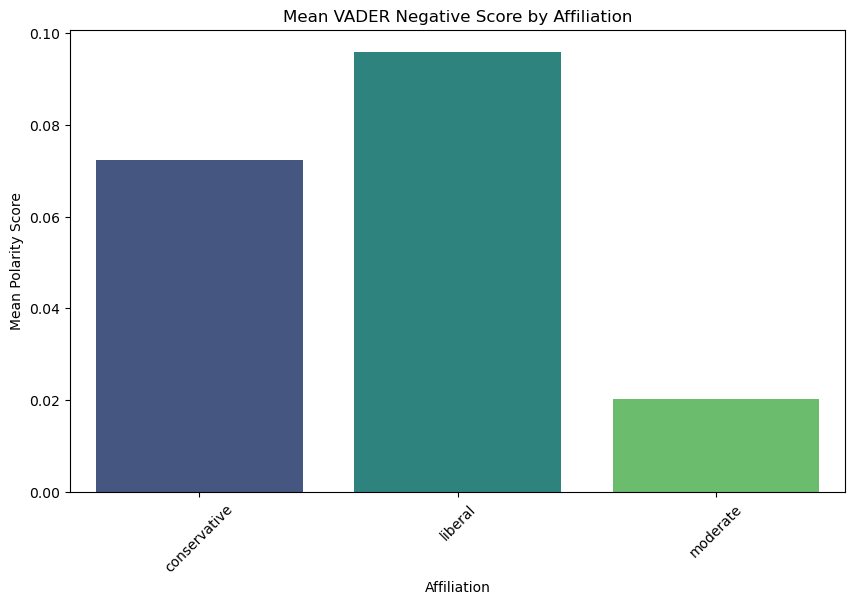

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'VADER Negative Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


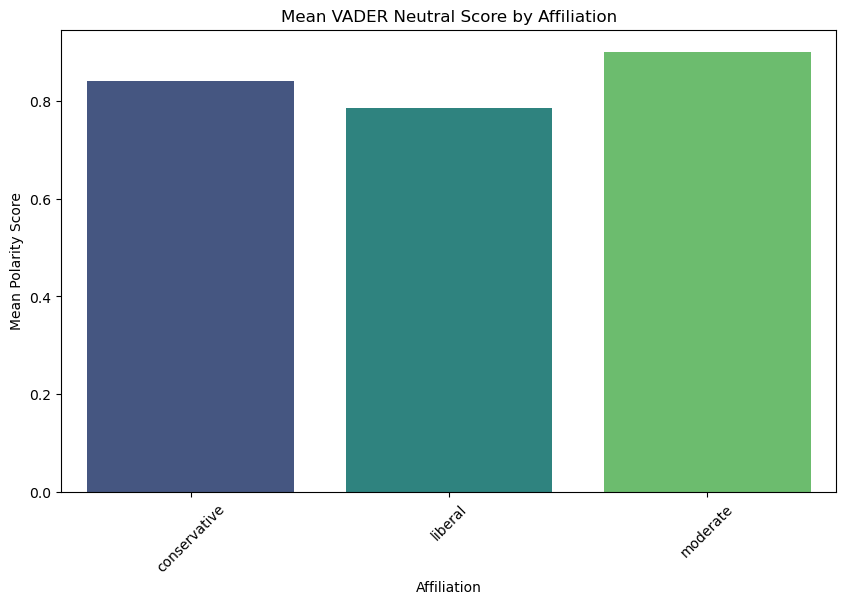

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'VADER Neutral Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


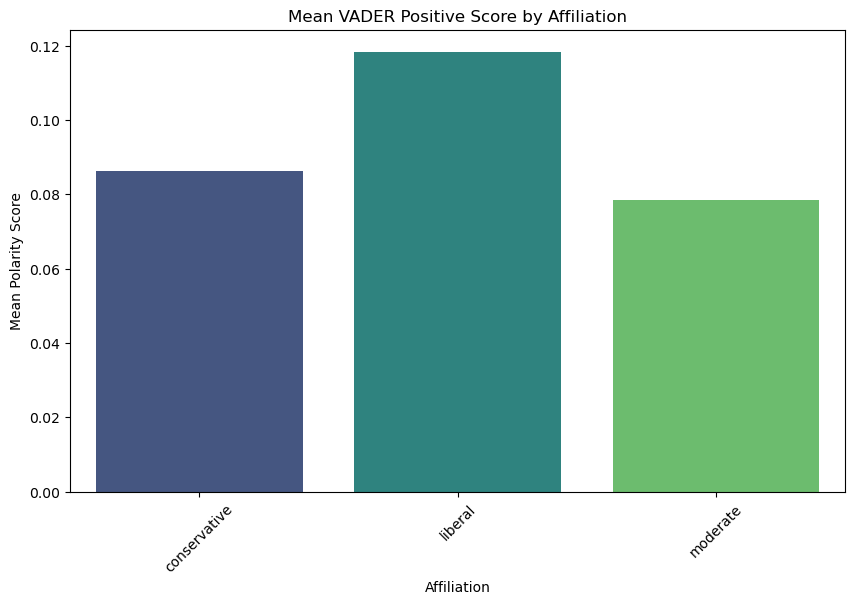

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'VADER Positive Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


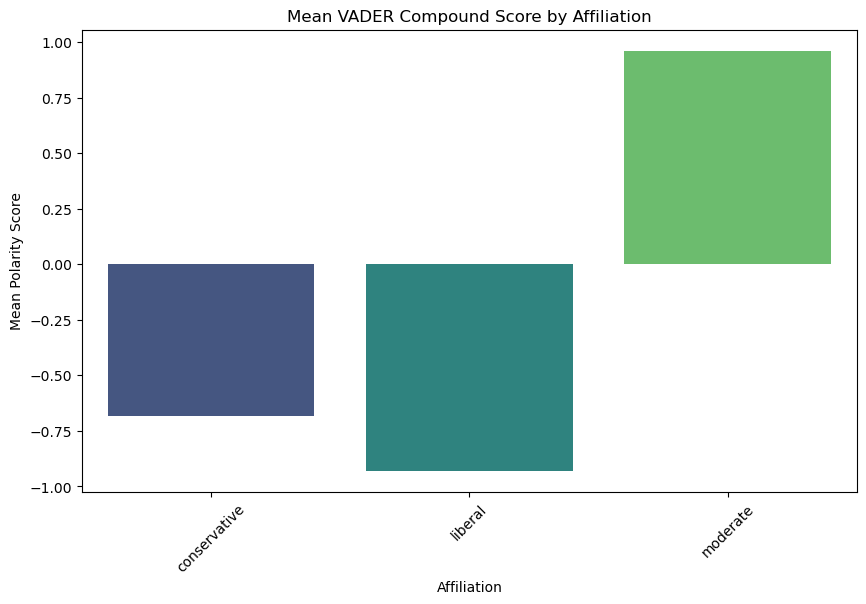

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'VADER Compound Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


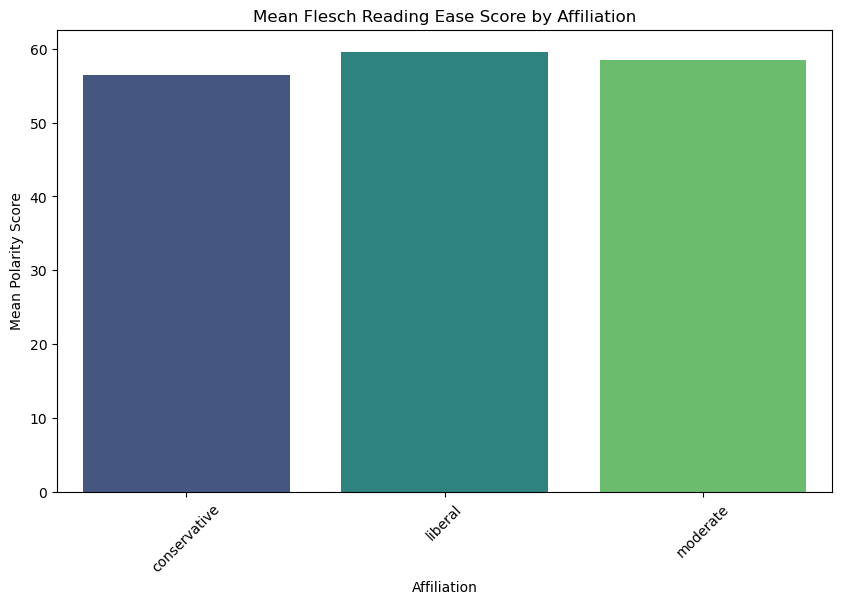

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'Flesch Reading Ease Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()


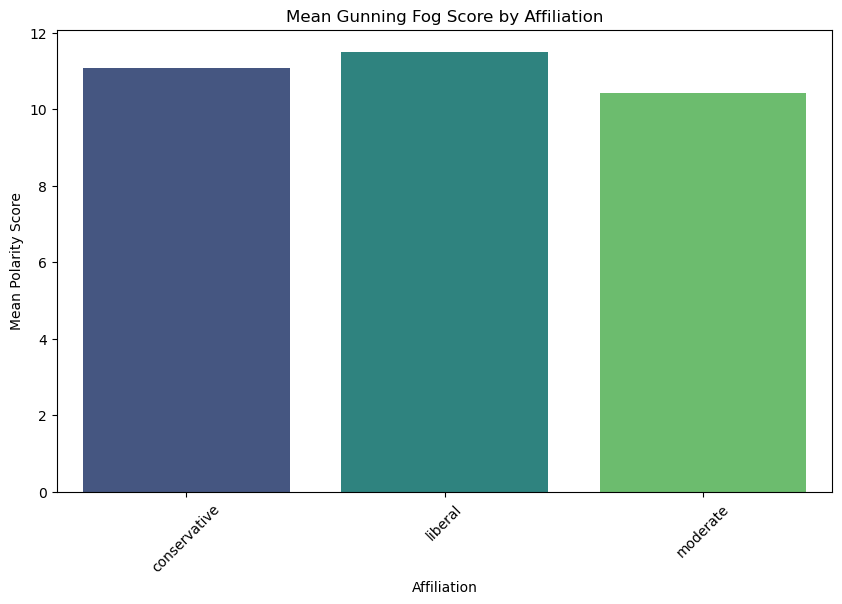

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

score = 'Gunning Fog Score'

# Group by 'affiliation' and calculate the mean polarity score
mean_scores = result_df.groupby('affiliation')[score].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliation', y=score, data=mean_scores, palette='viridis')
plt.title(f'Mean {score} by Affiliation')
plt.xlabel('Affiliation')
plt.ylabel('Mean Polarity Score')
plt.xticks(rotation=45)
plt.show()
